<a href="https://colab.research.google.com/github/saurabhdaund76/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mount google colab with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

Explore the dataset using head, tail, describe and null values

In [4]:
# Head gives the top 5 entries which gives the overview of the dataset.

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Tail gives the last 5 entries from which we get a more clear picture about the the dataset.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#  Shape gives the total entries of rows with their respective columns.

df.shape

(119390, 32)

In [6]:
df_copy = df.copy()


In [7]:
# Lets check the total null values in our dataset.

df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# check the total number of duplicate values

len(df[df.duplicated()])

31994

In [9]:
# Drop the duplicates

df = df.drop_duplicates()

In [10]:
# Since the columns agent and company contains maximum number of null values so dropping these columns won't affect our dataset.

df = df.drop(['agent','company'] , axis=1)

In [11]:
# Our final dataset contains 86940 rows with 30 columns

df.shape

(87396, 30)

In [24]:
df = df.dropna()

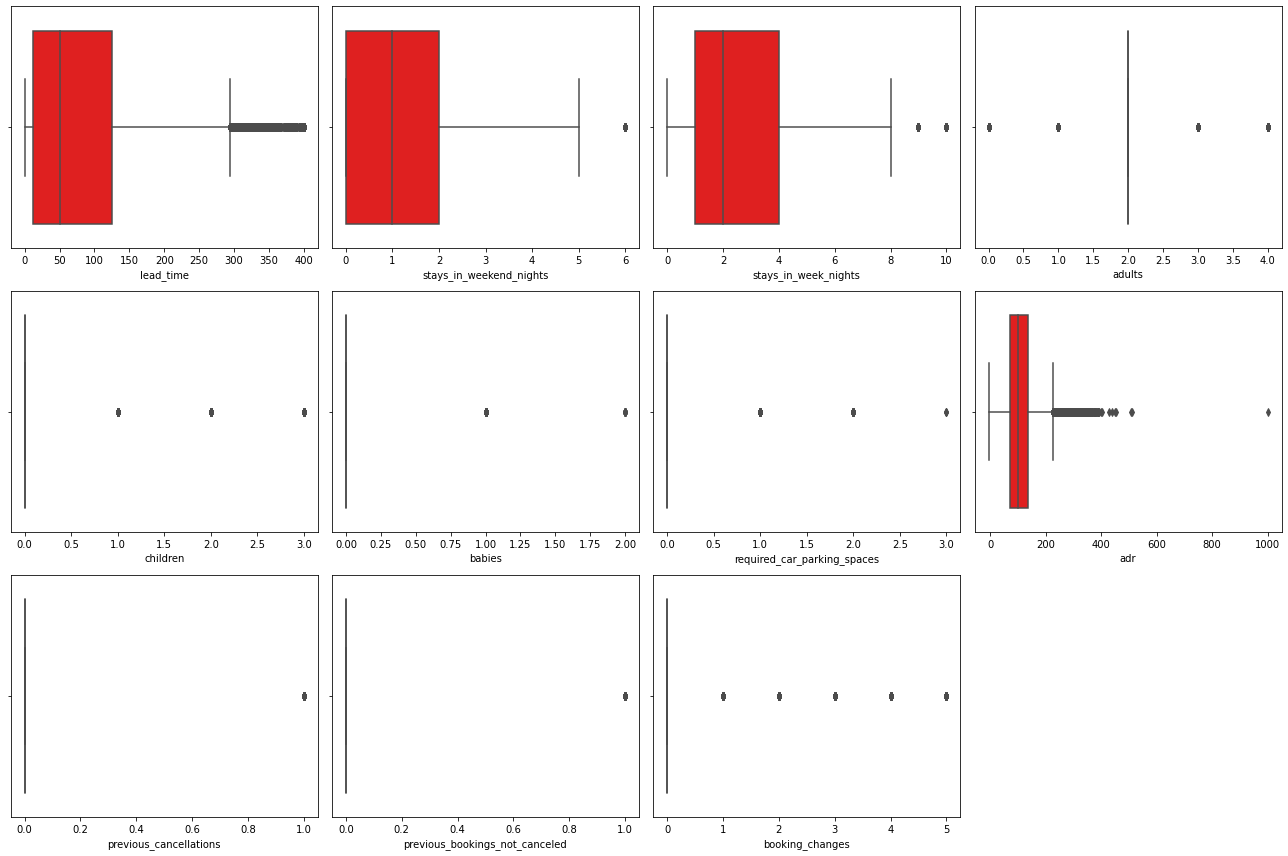

In [25]:
# we will deal with outliers with boxplot

# I stored numeric columns in columns variable as a list and applied for loop on it get outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(18,12))

for column in columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column], color= 'Red')
  plt.tight_layout()
plt.show()

In [26]:
# update the outliers with some specific values

df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.stays_in_weekend_nights >=  6, 'stays_in_weekend_nights'] = 6
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.children > 8, 'children'] = 0
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5

In [27]:
# for better understanding of variables from is canceled and is repeated we will change 1,0 values with string values 
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest']= df.is_repeated_guest.replace([1,0] , ['repeated_guest','not a repeated guest'])

In [28]:
df.describe(include= 'all')  # This describe will give overview about the mean median top mean of every column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_per_person
count,86810,86810,86810.000000,86810.000000,86810,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810.000000,86810,86810,86810,86810,86810,86810.000000,86810.000000,86810,86810,86810.000000,86810,86810.000000,86810,86810.000000,86810.000000,86810.000000,86810,86810,86810.000
unique,2,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,2,NaN,NaN,9,11,NaN,3,NaN,4,NaN,NaN,NaN,3,926,NaN
top,City Hotel,not_canceled,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,not a repeated guest,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14,NaN
freq,53297,62834,NaN,NaN,11221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67498,27364,51499,68941,83448,NaN,NaN,56092,46124,NaN,85666,NaN,71480,NaN,NaN,NaN,62834,211,NaN
mean,NaN,NaN,79.999436,2016.211911,NaN,26.839650,15.818189,1.004101,2.605368,1.877526,0.139304,0.010632,NaN,NaN,NaN,NaN,NaN,0.019065,0.038221,NaN,NaN,0.264981,NaN,0.749902,NaN,106.683716,0.083354,0.699804,NaN,NaN,inf
std,NaN,NaN,84.932434,0.685914,NaN,13.650338,8.834880,1.004434,1.890123,0.505084,0.455870,0.104125,NaN,NaN,NaN,NaN,NaN,0.136753,0.191731,NaN,NaN,0.663426,NaN,10.025030,NaN,51.906024,0.277956,0.831942,NaN,NaN,NaN
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,-3.190
25%,NaN,NaN,12.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN,38.125
50%,NaN,NaN,50.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,98.600000,0.000000,0.000000,NaN,NaN,50.150
75%,NaN,NaN,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,134.100000,0.000000,1.000000,NaN,NaN,67.500


**some of the rough colclusions are**

1.  Max no of bookings are from city hotels
2.  On an avarage 2016 was the year when people booked the hotel most
3.  Augest is the month with maximum bookings
4.  portugal is country with max customer base, 



***Univariates***


***Numeric columns and categorial columns***

```


Here I took Univariate and bivariates different 

In [29]:
# Numeric columns 
numeric_columns =  df.describe().columns
print(numeric_columns)
print(len(numeric_columns))

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'adr_per_person'],
      dtype='object')
17


Here I plotted every column using Pie chart to get some useful insights

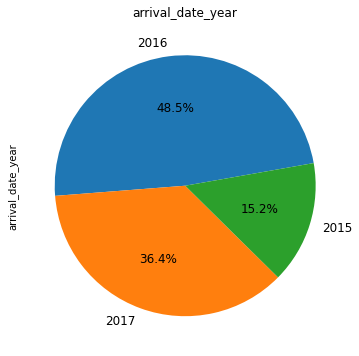

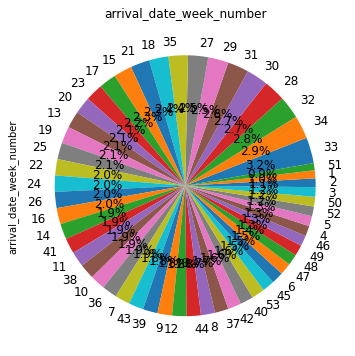

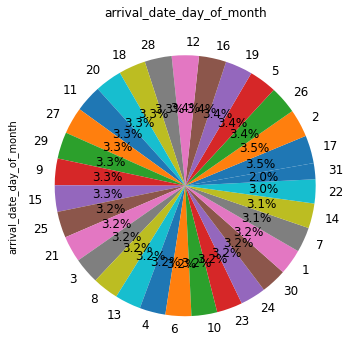

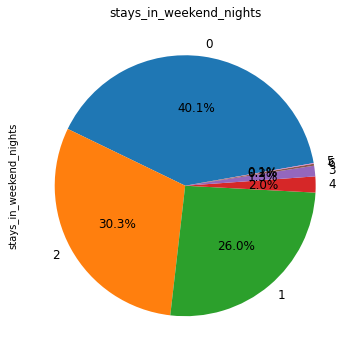

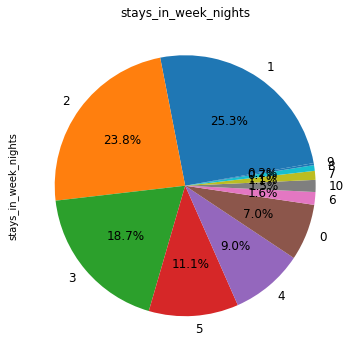

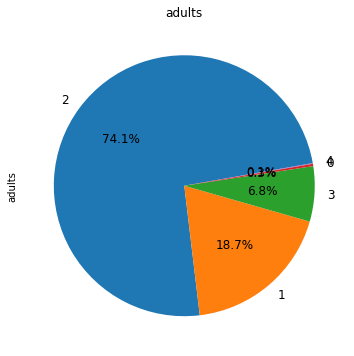

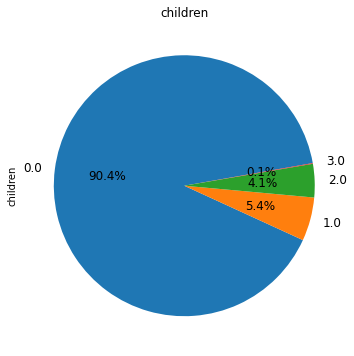

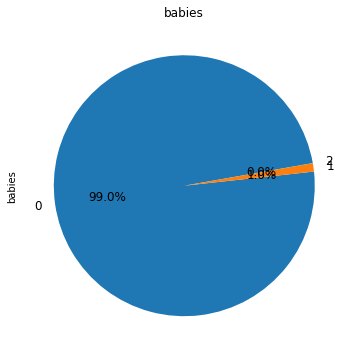

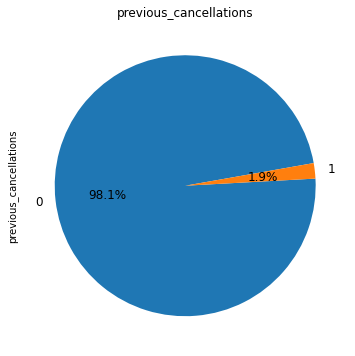

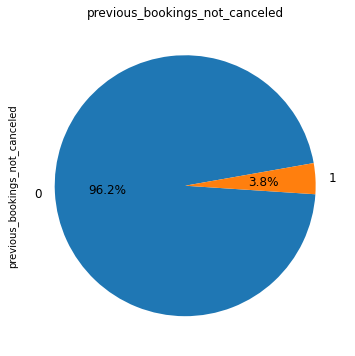

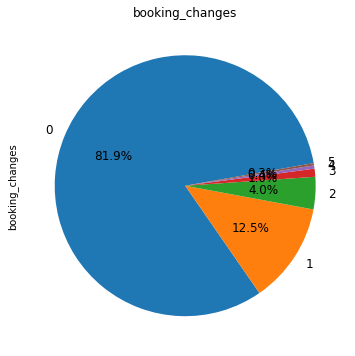

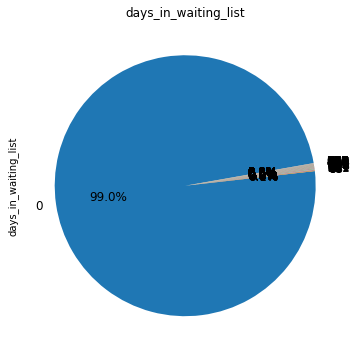

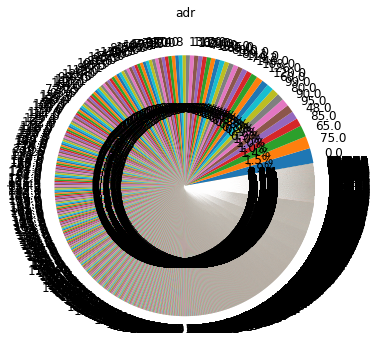

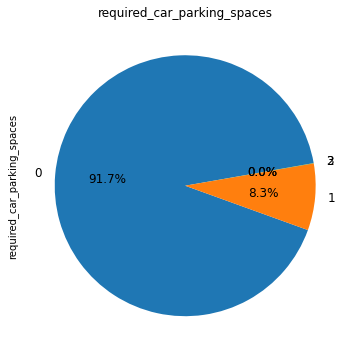

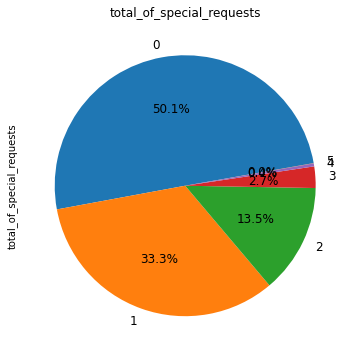

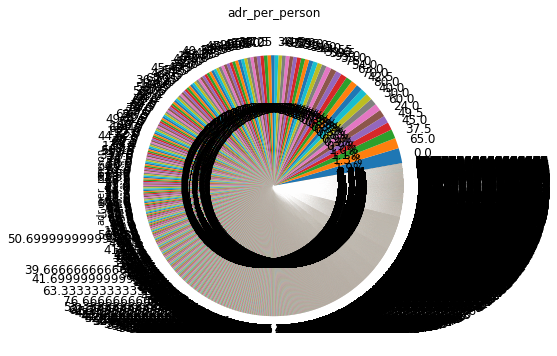

In [30]:
# so by applying for loop on numeric columns I plotted pie chart for all numeric columns

for column in numeric_columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  df[column].value_counts().plot(kind = 'pie', title=column, autopct='%1.1f%%', fontsize=12,startangle=10)
plt.show()
